<a href="https://colab.research.google.com/github/HIsu1231/AI_INOVATION_SQUARE/blob/master/NN2_BackPropogation_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [14]:
class NeuralNetwork():

  def __init__(self, input_nodes, hidden1_nodes, hidden2_nodes, output_nodes, learning_rate):

    self.W2 = np.random.randn(input_nodes, hidden1_nodes) / np.sqrt(input_nodes/2)
    self.b2 = np.random.rand(hidden1_nodes)

    self.W3 = np.random.randn(hidden1_nodes, hidden2_nodes) / np.sqrt(hidden1_nodes/2)
    self.b3 = np.random.rand(hidden2_nodes)

    self.W4 = np.random.randn(hidden2_nodes, output_nodes) / np.sqrt(hidden2_nodes/2)
    self.b4 = np.random.rand(output_nodes)

    self.learning_rate = learning_rate

  def feed_forward(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data
    
    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3) 

    self.z4 = np.dot(self.a3, self.W4) + self.b4
    self.a4 = sigmoid(self.z4)

    return -np.sum(self.target_data * np.log(self.a4 + delta) + (1 - self.target_data) * np.log((1 - self.a4) + delta))

  def loss_val(self):

    delta = 1e-7

    self.z1 = self.input_data
    self.a1 = self.input_data

    self.z2 = np.dot(self.a1, self.W2) + self.b2
    self.a2 = sigmoid(self.z2)

    self.z3 = np.dot(self.a2, self.W3) + self.b3
    self.a3 = sigmoid(self.z3)

    self.z4 = np.dot(self.a3, self.W4) + self.b4
    self.a4 = sigmoid(self.z4)

    return -np.sum(self.target_data * np.log(self.a4 + delta) + (1 - self.target_data) * np.log((1 - self.a4) + delta))

  def accuracy(self, test_input_data, test_target_data):

    matched_list = []
    unmatched_list = []

    for i in range(len(test_input_data)):

      label = int(test_target_data[i])

      data = (test_input_data[i] / 255.0 * 0.99) + 0.01

      predicted_num = self.predict(np.array(data, ndmin=2))

      if predicted_num == label:
        matched_list.append(i)

      else:
        unmatched_list.append(i)

    accuracy_val = len(matched_list)/len(test_input_data)

    return accuracy_val, unmatched_list

  def train(self, input_data, target_data):

    self.input_data = input_data
    self.target_data = target_data

    loss_val = self.feed_forward()

    loss_4 = (self.a4 - self.target_data) * self.a4 * (1 - self.a4)
    loss_3 = np.dot(loss_4,self.W4.T) * self.a3 * (1 - self.a3)
    loss_2 = np.dot(loss_3,self.W3.T) * self.a2 * (1 - self.a2)

    self.W2 = self.W2 - self.learning_rate * np.dot(self.a1.T,loss_2)
    self.b2 = self.b2 - self.learning_rate * loss_2

    self.W3 = self.W3 - self.learning_rate * np.dot(self.a2.T,loss_3)
    self.b3 = self.b3 - self.learning_rate * loss_3

    self.W4 = self.W4 - self.learning_rate * np.dot(self.a3.T,loss_4)
    self.b4 = self.b4 - self.learning_rate * loss_4

  def predict(self, input_data):

    z2 = np.dot(input_data, self.W2) + self.b2
    a2 = sigmoid(z2)

    z3 = np.dot(a2,self.W3) + self.b3
    a3 = sigmoid(z3)

    z4 = np.dot(a3,self.W4) + self.b4
    a4 = sigmoid(z4)

    predicted_num = np.argmax(a4)
    
    return predicted_num

In [7]:
pwd

'/content'

In [9]:
training_data = np.loadtxt("./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_train.csv",delimiter=',',dtype=np.float32)

print("training_data.shape = ",training_data.shape)

training_data.shape =  (60000, 785)


### 784 X 30 X 20 X 1

In [15]:
#hyper_parameter

i_nodes = training_data.shape[1] - 1
h1_nodes = 30
h2_nodes = 20
o_nodes = 10
epochs = 1
lr = 0.1

loss_val_list = []

nn = NeuralNetwork(i_nodes, h1_nodes, h2_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
  for step in range(len(training_data)):
    
    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[step,0])] = 0.99

    input_data = (training_data[step, 1: ] / 255.0 * 0.99) + 0.01

    nn.train(np.array(input_data,ndmin=2), np.array(target_data, ndmin=2))

    if step % 1000 == 0:
      print("step = ",step, ", current loss value = ",nn.loss_val())

    loss_val_list.append(nn.loss_val())   

end_time = datetime.now()
print("\nElapsed time => ",end_time - start_time)

step =  0 , current loss value =  8.159334613843551
step =  1000 , current loss value =  3.2630909893148963
step =  2000 , current loss value =  3.010374485419561
step =  3000 , current loss value =  3.931427341854813
step =  4000 , current loss value =  1.8576414747734975
step =  5000 , current loss value =  1.351927801608633
step =  6000 , current loss value =  1.253147996442288
step =  7000 , current loss value =  2.140847520120467
step =  8000 , current loss value =  0.8404061148306456
step =  9000 , current loss value =  1.1782008311543932
step =  10000 , current loss value =  0.9362638202255964
step =  11000 , current loss value =  0.8636883531106104
step =  12000 , current loss value =  1.1638263782346558
step =  13000 , current loss value =  1.0274027748268464
step =  14000 , current loss value =  0.6612808438377471
step =  15000 , current loss value =  1.014205170877493
step =  16000 , current loss value =  0.8010794718537702
step =  17000 , current loss value =  1.02807883541

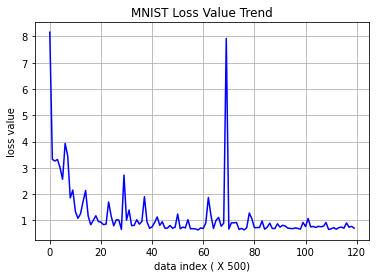

In [18]:
#손실함수 추세 확인

Y_DATA_LIST = []

for i in range(0, len(loss_val_list), 500):
  Y_DATA_LIST.append(loss_val_list[i])

plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()

In [17]:
test_data = np.loadtxt("./drive/MyDrive/AI_INOVATION_SQUARE/data/mnist_test.csv",delimiter=',',dtype=np.float32)

test_input_data = test_data[:,1: ]
test_target_data = test_data[:,0]

print("test_data.shape = ",test_data.shape)

(acc_ret, false_list) = nn.accuracy(test_input_data, test_target_data)

print("Accuracy = ", np.round(100*acc_ret,3),"%")

test_data.shape =  (10000, 785)
Accuracy =  92.04 %


### 784 X 40 X 40 X 10

In [20]:
i_nodes = training_data.shape[1] - 1
h1_nodes = 40
h2_nodes = 40
o_nodes = 10
lr = 0.1
epochs = 1

nn = NeuralNetwork(i_nodes, h1_nodes, h2_nodes, o_nodes, lr)

loss_val_list = []

start_time = datetime.now()

for i in range(epochs):
  for step in range(len(training_data)):

    target_data = np.zeros(o_nodes) + 0.01
    target_data[int(training_data[step,0])] = 0.99

    input_data = (training_data[step, 1: ] / 255.0 * 0.99) + 0.01

    nn.train(np.array(input_data,ndmin = 2),np.array(target_data, ndmin=2))

    if step % 1000 == 0:
      print("step = ",step,", current loss value = ",nn.loss_val())

    loss_val_list.append(nn.loss_val())

end_time = datetime.now()
print("\nElapsed time = ",end_time - start_time)

step =  0 , current loss value =  9.456169969764241
step =  1000 , current loss value =  3.1753315407163933
step =  2000 , current loss value =  3.1292890418663375
step =  3000 , current loss value =  3.6287681096208795
step =  4000 , current loss value =  1.477742997719899
step =  5000 , current loss value =  1.1475729207422056
step =  6000 , current loss value =  0.8765701777074475
step =  7000 , current loss value =  1.504598181601438
step =  8000 , current loss value =  0.7861331115122389
step =  9000 , current loss value =  0.9918213204567854
step =  10000 , current loss value =  0.7616188302712054
step =  11000 , current loss value =  0.7420560503679636
step =  12000 , current loss value =  0.8754705255357429
step =  13000 , current loss value =  0.9613803536105211
step =  14000 , current loss value =  0.6608428463664193
step =  15000 , current loss value =  1.0593695783223724
step =  16000 , current loss value =  0.6793350259524988
step =  17000 , current loss value =  0.9284146

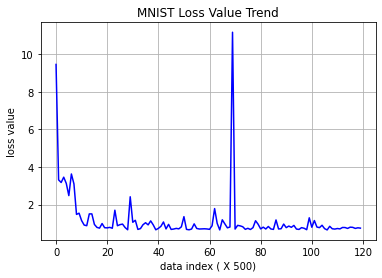

In [21]:
#손실함수 추세 확인

Y_DATA_LIST = []

for i in range(0, len(loss_val_list), 500):
  Y_DATA_LIST.append(loss_val_list[i])

plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500)')
plt.ylabel('loss value')
plt.grid()
plt.plot(Y_DATA_LIST, color='b')
plt.show()

In [22]:
(acc_ret, false_list) = nn.accuracy(test_input_data, test_target_data)

print("Accuracy = ", np.round(acc_ret*100,3),'%')

Accuracy =  92.97 %
